In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


In [2]:
df = pd.read_csv('train_HP.csv', delimiter = ',')
df.shape

(2000, 21)

In [3]:
df = df.dropna()

In [4]:
df =df[(df.sc_w > 0)] #lebar tidak mungkin 0
df =df[(df.px_height > 0)] #pixel tinggi tidak mungkin 0

In [5]:
df.shape

(1819, 21)

<AxesSubplot:>

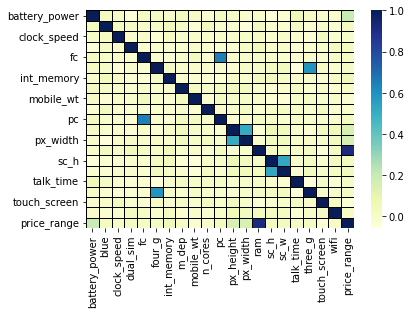

In [7]:
korelasi = df.corr()
sns.heatmap(data=korelasi, cmap="YlGnBu", linecolor="black", linewidths=0.5)

In [8]:
df.corr()['price_range'].sort_values()

touch_screen    -0.033778
mobile_wt       -0.023780
n_cores         -0.009938
clock_speed     -0.003857
m_dep            0.003151
talk_time        0.010925
four_g           0.014578
three_g          0.016910
fc               0.017528
wifi             0.020652
dual_sim         0.022761
pc               0.023224
sc_h             0.024171
blue             0.028674
sc_w             0.031775
int_memory       0.051512
px_height        0.149783
px_width         0.150435
battery_power    0.193879
ram              0.917045
price_range      1.000000
Name: price_range, dtype: float64

In [52]:
dt_10kol = df[['battery_power','ram','px_height', 'px_width','int_memory','mobile_wt', 'sc_w']]
array_10kol = np.array(dt_10kol.values)

labels = df[['price_range']]

labels_np = np.array(labels.values)

labels_np = labels_np.ravel()

le = preprocessing.LabelEncoder()

labels_en = le.fit_transform(labels_np)

print(labels_en)


[1 2 2 ... 3 0 3]


In [53]:
X = array_10kol
Y = labels_en

In [54]:
selector = SelectKBest(score_func=chi2, k=7)
selector.fit(X, Y)

cols = selector.get_support(indices = True)

df_features = dt_10kol.iloc[:, cols]

df_features.head()

,battery_power,ram,px_height,px_width,int_memory,mobile_wt,sc_w
0,842,2549,20,756,7,188,7
1,1021,2631,905,1988,53,136,3
2,563,2603,1263,1716,41,145,2
3,615,2769,1216,1786,10,131,8
4,1821,1411,1208,1212,44,141,2


In [55]:
array_fitur = np.array(df_features.values)

X_train, X_test, Y_train, Y_test = train_test_split(array_fitur, labels_en, test_size=0.3)

In [56]:
classes = ['0', '1', '2', '3']

In [10]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, Y_train)
Y_pred = knn_model.predict(X_test)

print(classification_report(Y_test, Y_pred, target_names=classes))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       131
           1       0.90      0.87      0.88       141
           2       0.88      0.86      0.87       146
           3       0.89      0.93      0.91       128

    accuracy                           0.90       546
   macro avg       0.90      0.90      0.90       546
weighted avg       0.90      0.90      0.90       546



In [42]:
nbc_model = GaussianNB()
nbc_model.fit(X_train, Y_train, )

Y_pred = nbc_model.predict(X_test)

print(classification_report(Y_test, Y_pred, target_names = classes))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88       131
           1       0.70      0.71      0.70       141
           2       0.74      0.75      0.74       146
           3       0.90      0.92      0.91       128

    accuracy                           0.80       546
   macro avg       0.81      0.81      0.81       546
weighted avg       0.81      0.80      0.80       546



----

In [11]:
arrAkurasiDT = []
for x in range(1, 100):
    DT_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=x)
    DT_model.fit(X_train,Y_train)

    Y_pred = DT_model.predict(X_test)

    print('depth =', x)
    print(classification_report(Y_test, Y_pred, target_names = classes))

    akurasiDT = classification_report(Y_test, Y_pred,target_names = classes, output_dict=True)
    dtAkurasiDT = akurasiDT['accuracy']
    arrAkurasiDT.append(dtAkurasiDT)
    x+=1

depth = 1
              precision    recall  f1-score   support

           0       0.47      1.00      0.64       131
           1       0.00      0.00      0.00       141
           2       0.00      0.00      0.00       146
           3       0.48      1.00      0.65       128

    accuracy                           0.47       546
   macro avg       0.24      0.50      0.32       546
weighted avg       0.23      0.47      0.31       546

depth = 2
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       131
           1       0.67      0.72      0.69       141
           2       0.72      0.66      0.69       146
           3       0.83      0.88      0.85       128

    accuracy                           0.76       546
   macro avg       0.77      0.77      0.77       546
weighted avg       0.77      0.76      0.76       546

depth = 3
              precision    recall  f1-score   support

           0       0.86      0.82      0.84  

c:\Users\anton\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anton\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anton\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       131
           1       0.84      0.77      0.80       141
           2       0.80      0.78      0.79       146
           3       0.85      0.92      0.88       128

    accuracy                           0.85       546
   macro avg       0.85      0.85      0.85       546
weighted avg       0.85      0.85      0.84       546

depth = 14
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       131
           1       0.83      0.78      0.80       141
           2       0.81      0.77      0.79       146
           3       0.86      0.93      0.89       128

    accuracy                           0.85       546
   macro avg       0.85      0.85      0.85       546
weighted avg       0.85      0.85      0.85       546

depth = 15
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       131

In [12]:
index = range(1, 100)
dfAkurasiDT = pd.DataFrame(list(zip(arrAkurasiDT)), columns=['accuracy'], index=index)

In [13]:
max = 0
depth = 0
for x in range(0, 99):
    if (arrAkurasiDT[x] > max):
        max = arrAkurasiDT[x]
        depth = x

print('akurasi = ',  max)
print('depth = ', depth+1)

akurasi =  0.8663003663003663
depth =  8


In [16]:
min = 1
depthMin = 0
for x in range(0, 49):
    if (arrAkurasiDT[x] < min):
        min = arrAkurasiDT[x]
        depthMin = x

print('akurasi = ',  min)
print('depth = ', depthMin + 1)

IndexError: list index out of range

(0.0, 523.9)

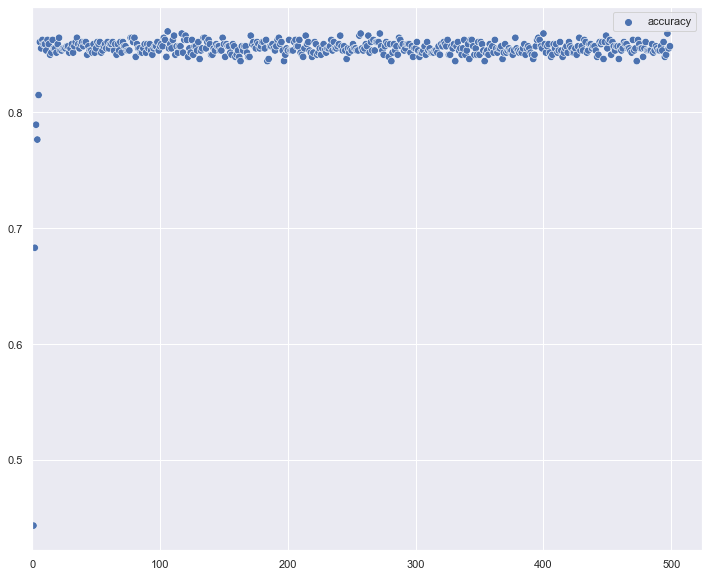

In [124]:
sns.scatterplot(data = dfAkurasiDT, s = 55)
sns.set(rc={'figure.figsize':(12, 10)})
plt.xlim(0, None)

In [19]:
arrAkurasiRF = []
for x in range(1, 100):
    RF_model = RandomForestClassifier(n_estimators=x, criterion='entropy', max_depth=7)
    RF_model.fit(X_train,Y_train)
    Y_pred = RF_model.predict(X_test)

    print('depth =', x)
    print(classification_report(Y_test, Y_pred, target_names = classes))

    akurasiRF = classification_report(Y_test, Y_pred,target_names = classes, output_dict=True)
    dtAkurasiRF = akurasiRF['accuracy']
    arrAkurasiRF.append(dtAkurasiRF)
    x+=1

depth = 1
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       131
           1       0.63      0.57      0.60       141
           2       0.55      0.47      0.51       146
           3       0.54      0.69      0.61       128

    accuracy                           0.62       546
   macro avg       0.63      0.63      0.62       546
weighted avg       0.62      0.62      0.62       546

depth = 2
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       131
           1       0.78      0.81      0.79       141
           2       0.74      0.65      0.69       146
           3       0.76      0.86      0.81       128

    accuracy                           0.80       546
   macro avg       0.80      0.80      0.80       546
weighted avg       0.80      0.80      0.80       546

depth = 3
              precision    recall  f1-score   support

           0       0.91      0.89      0.90  

In [20]:
index = range(1, 100)
dfAkurasiRF = pd.DataFrame(list(zip(arrAkurasiRF)), columns=['accuracy'], index=index)

In [21]:
max = 0
depth = 0
for x in range(0, 99):
    if (arrAkurasiRF[x] > max):
        max = arrAkurasiRF[x]
        depth = x

print('akurasi = ',  max)
print('n_estimator = ', depth+1)

akurasi =  0.8901098901098901
n_estimator =  33


(0.0, 103.9)

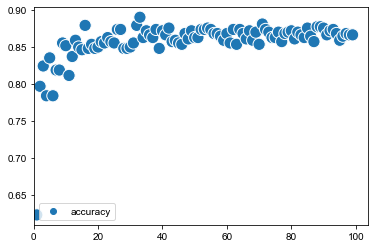

In [31]:
sns.scatterplot(data = dfAkurasiRF, s = 150)
sns.set(rc={'figure.figsize':(12, 10)})
plt.xlim(0, None)

In [22]:
int_class_names= DT_model.classes_
str_class_names = int_class_names.astype(str)


In [15]:
dot_data = export_graphviz(DT_model,feature_names= df_features.columns, class_names= str_class_names, filled=True,rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("Dtree_phone.png")



True

In [23]:
int_class_names= RF_model.classes_
str_class_names = int_class_names.astype(str)


----

In [57]:
RF_model = RandomForestClassifier(n_estimators=98, criterion='entropy', max_depth=7)
RF_model.fit(X_train,Y_train)
Y_pred = RF_model.predict(X_test)

print(classification_report(Y_test, Y_pred, target_names = classes))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       128
           1       0.88      0.83      0.85       135
           2       0.83      0.84      0.84       129
           3       0.94      0.95      0.94       154

    accuracy                           0.90       546
   macro avg       0.89      0.89      0.89       546
weighted avg       0.90      0.90      0.90       546



In [59]:
pkl_filename = "newTestHP.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(RF_model, file)

In [60]:
pkl_filename = "newTestHP.pkl"  
with open(pkl_filename, 'rb') as file:  
    loaded_model = pickle.load(file)

In [1]:
df_new = pd.read_csv('new_test_HP.csv', delimiter = ',')

X_new = df_new[['battery_power','ram','px_height', 'px_width','int_memory','mobile_wt', 'sc_w']]

Y_pred_new = loaded_model.predict(X_new)
print(Y_pred_new)

NameError: name 'pd' is not defined